In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_excel("Weekly Loading Barrels  (exports) 30th Jan.xlsx")

In [7]:
dff = df

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251195 entries, 0 to 251194
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   year                          251195 non-null  int64  
 1   week                          251195 non-null  int64  
 2   destination_countryname       250240 non-null  object 
 3   destination_portname          251192 non-null  object 
 4   previous_loading_countryname  246817 non-null  object 
 5   origin_countryname            250007 non-null  object 
 6   origin_portname               250828 non-null  object 
 7   continent                     250240 non-null  object 
 8   no_of_ships                   251195 non-null  int64  
 9   loadedbarrels                 122772 non-null  float64
 10  loadedbarrels_new             122772 non-null  float64
 11  date                          251195 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory us

In [9]:
dff

,year,week,destination_countryname,destination_portname,previous_loading_countryname,origin_countryname,origin_portname,continent,no_of_ships,loadedbarrels,loadedbarrels_new,date
0,2012,1,Angola,Kizomba A Terminal,Singapore,Angola,Kizomba Terminals Anchorage,Africa,1,229101.10,222929.40,2012-06-01 00:00:00
1,2012,1,Aruba,Aruba Outer Anchorage,NaN,Netherlands Antilles,Bullen Bay,North America,1,641610.49,624327.17,2012-06-01 00:00:00
2,2012,1,Aruba,Aruba STS Transhipment Area,Venezuela,Venezuela,Punta Cardon Anchorage,North America,1,698372.73,646325.00,2012-06-01 00:00:00
3,2012,1,Australia,Brisbane,Australia,Australia,Kurnell,Australia/Oceania,1,NaN,NaN,2012-06-01 00:00:00
4,2012,1,Australia,Brisbane,NaN,Australia,Brisbane Anchorage,Australia/Oceania,3,472902.78,460164.34,2012-06-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
251190,2017,52,United States of America,South Sabine Point Western Extension,Gibraltar,Gibraltar,Gibraltar Bay Anchorage,North America,1,NaN,NaN,2018-05-01 00:00:00
251191,2017,52,United States of America,South Sabine Point Western Extension,Iraq,United States of America,Mississippi River SW Pass Lighterage Area,North America,1,NaN,NaN,2018-05-01 00:00:00
251192,2017,52,United States of America,South Sabine Point Western Extension,United States of America,United States of America,Galveston Approach Anchorage,North America,2,803882.27,782536.34,2018-05-01 00:00:00
251193,2017,52,Venezuela,El Palito,Venezuela,Venezuela,El Palito Anchorage,South America,1,NaN,NaN,2018-05-01 00:00:00


In [4]:
dff.isnull().sum()

year                                 0
week                                 0
destination_countryname            955
destination_portname                 3
previous_loading_countryname      4378
origin_countryname                1188
origin_portname                    367
continent                          955
no_of_ships                          0
loadedbarrels                   128423
loadedbarrels_new               128423
date                                 0
dtype: int64

In [10]:
for year, df in dff.groupby('year'):
    print(year)
    

2012
2013
2014
2015
2016
2017


In [11]:
dff.index

RangeIndex(start=0, stop=251195, step=1)

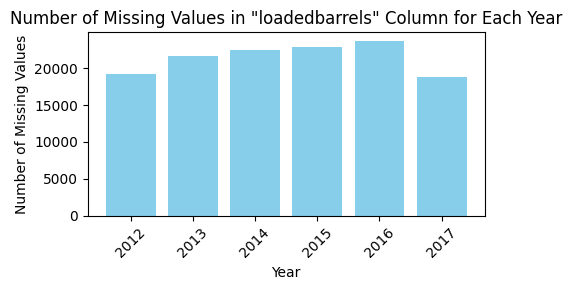

In [12]:
missing_values_per_year = {}

# Iterate over each year in the DataFrame
for year, year_df in dff.groupby('year'):
    # Count the number of missing values in the 'loadedbarrels' column for the current year
    missing_values = year_df.isnull().sum().loc['loadedbarrels']
    # Store the year as key and the number of missing values as value in the dictionary
    missing_values_per_year[year] = missing_values

# Plotting Bar Chart
plt.figure(figsize=(5, 3))
plt.bar(missing_values_per_year.keys(), missing_values_per_year.values(), color='skyblue')
plt.title('Number of Missing Values in "loadedbarrels" Column for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calculating percentage of missing values per `origin_portname` 

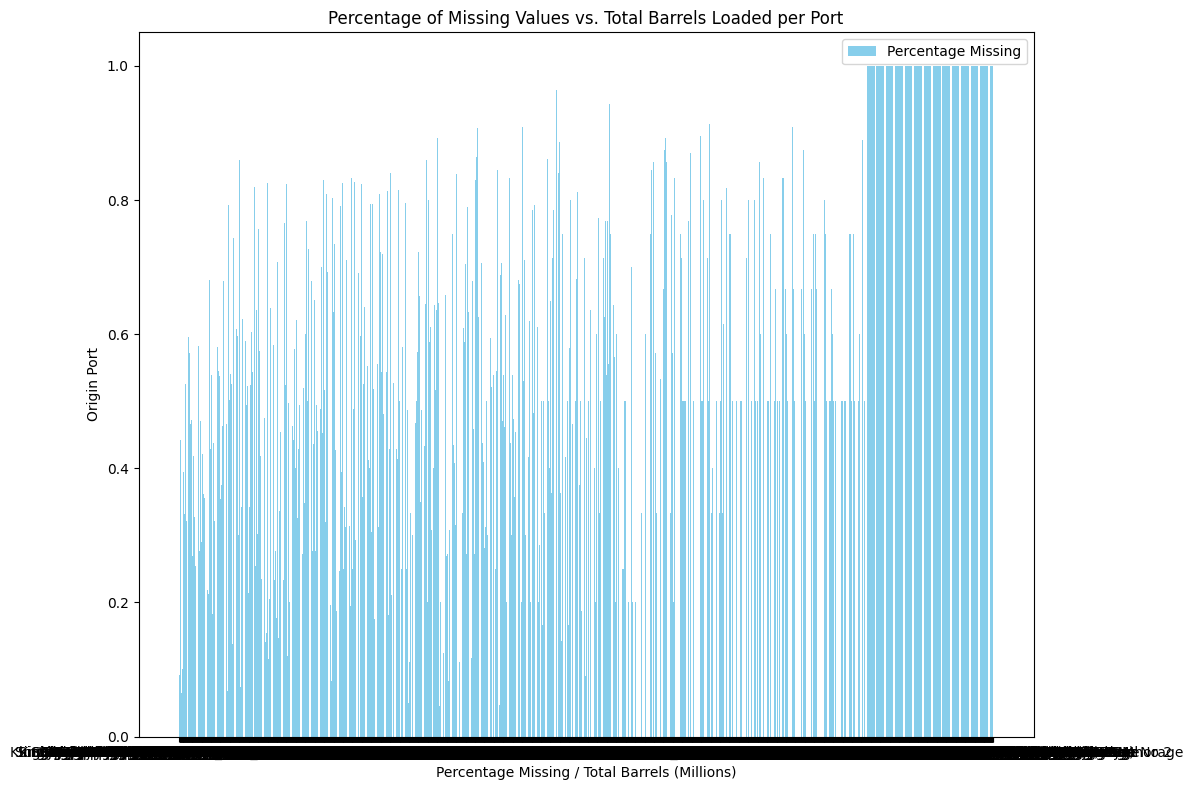

In [13]:
total_barrels_per_port = dff.groupby('origin_portname')['loadedbarrels'].sum()

percentage_missing = {}

for port, df in dff.groupby('origin_portname'):
    missing_values = df.isnull().sum().loc['loadedbarrels']
    percentage_missing[port] = missing_values / len(df)

sorted_ports = total_barrels_per_port.sort_values(ascending=False).index

# Plotting Bar Chart
plt.figure(figsize=(12, 8))

# Plot bars for percentage of missing values
plt.bar(sorted_ports, [percentage_missing[port] for port in sorted_ports], color='skyblue', label='Percentage Missing')

# Set y-ticks and labels
#plt.yticks(range(len(sorted_ports)), sorted_ports)
plt.xlabel('Percentage Missing / Total Barrels (Millions)')
plt.ylabel('Origin Port')
plt.title('Percentage of Missing Values vs. Total Barrels Loaded per Port')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
sorted_ports

Index(['Ras Tanura Northern Holding Anchorage', 'Ras Tanura Tanker Anchorage',
       'Fujairah Anchorage No 2', 'Al Basra Oil Terminal Anchorage A',
       'MIna Al Ahmadi SPM Anchorage', 'Fujairah Anchorage B',
       'Jose Terminal Anchorage', 'Port Klang Lay-Up Anchorage',
       'Al-Basra Oil Terminal Anchorage A', 'Novorossiysk Anchorage 416',
       ...
       'Ishinomaki Anchorage', 'Isabela', 'Iligan',
       'Singapore Selat Pauh Anchorage (ASPLU)', 'Huntington Beach',
       'Humen Anchorage Berths 41 to 44SJ', 'Huludao',
       'Huizhou Anchorage No 4', 'Huizhou Anchorage No 2',
       'Sokhna Anchorage Berths'],
      dtype='object', name='origin_portname', length=3341)

Clearly, the smallest origin ports (seen on the right of this bar chart) are missing 100% of the data

In [45]:
dff[dff['origin_portname'] == 'Sokhna Anchorage Berths']

,year,week,destination_countryname,destination_portname,previous_loading_countryname,origin_countryname,origin_portname,continent,no_of_ships,loadedbarrels,loadedbarrels_new,date
30823,2012,44,Egypt,Ain Sukhna Terminal,Egypt,Egypt,Sokhna Anchorage Berths,Africa,1,NaN,NaN,2012-02-11 00:00:00
142604,2015,22,United States of America,LOOP Terminal Anchorage,Iraq,Egypt,Sokhna Anchorage Berths,North America,1,NaN,NaN,5/29/2015


In [44]:
dff.groupby('origin_portname')[dff['loadedbarrels'] == '0'].sum()

KeyError: 'Columns not found: False'

In [47]:
dff.groupby('origin_portname')['loadedbarrels'].sum().sort_values(ascending=False)

origin_portname
Ras Tanura Northern Holding Anchorage    4.343770e+09
Ras Tanura Tanker Anchorage              2.659199e+09
Fujairah Anchorage No 2                  2.265069e+09
Al Basra Oil Terminal Anchorage A        2.183768e+09
MIna Al Ahmadi SPM Anchorage             2.018233e+09
                                             ...     
Humen Anchorage Berths 41 to 44SJ        0.000000e+00
Huludao                                  0.000000e+00
Huizhou Anchorage No 4                   0.000000e+00
Huizhou Anchorage No 2                   0.000000e+00
Sokhna Anchorage Berths                  0.000000e+00
Name: loadedbarrels, Length: 3341, dtype: float64

Remove all ports, which are listed as origin ports, but have no values available in any given year (we know because we sum and the sum across all years from origin ports turn out to be zero).

In [15]:
# shipments across the year without filling values
# we modify 'dff' so only run once

origin_no_barrels = dff.groupby('origin_portname')['loadedbarrels'].sum().sort_values(ascending=False)[dff.groupby('origin_portname')['loadedbarrels'].sum().sort_values(ascending=False) == 0]
dff = dff[~dff['origin_portname'].isin(origin_no_barrels.index)]


In [16]:
dff

,year,week,destination_countryname,destination_portname,previous_loading_countryname,origin_countryname,origin_portname,continent,no_of_ships,loadedbarrels,loadedbarrels_new,date
0,2012,1,Angola,Kizomba A Terminal,Singapore,Angola,Kizomba Terminals Anchorage,Africa,1,229101.10,222929.40,2012-06-01 00:00:00
1,2012,1,Aruba,Aruba Outer Anchorage,NaN,Netherlands Antilles,Bullen Bay,North America,1,641610.49,624327.17,2012-06-01 00:00:00
2,2012,1,Aruba,Aruba STS Transhipment Area,Venezuela,Venezuela,Punta Cardon Anchorage,North America,1,698372.73,646325.00,2012-06-01 00:00:00
3,2012,1,Australia,Brisbane,Australia,Australia,Kurnell,Australia/Oceania,1,NaN,NaN,2012-06-01 00:00:00
4,2012,1,Australia,Brisbane,NaN,Australia,Brisbane Anchorage,Australia/Oceania,3,472902.78,460164.34,2012-06-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
251190,2017,52,United States of America,South Sabine Point Western Extension,Gibraltar,Gibraltar,Gibraltar Bay Anchorage,North America,1,NaN,NaN,2018-05-01 00:00:00
251191,2017,52,United States of America,South Sabine Point Western Extension,Iraq,United States of America,Mississippi River SW Pass Lighterage Area,North America,1,NaN,NaN,2018-05-01 00:00:00
251192,2017,52,United States of America,South Sabine Point Western Extension,United States of America,United States of America,Galveston Approach Anchorage,North America,2,803882.27,782536.34,2018-05-01 00:00:00
251193,2017,52,Venezuela,El Palito,Venezuela,Venezuela,El Palito Anchorage,South America,1,NaN,NaN,2018-05-01 00:00:00


Compare: data where `NaN` values are filled in using median values for that origin port **vs.** removing all rows containing NaN as we think we have enough data

In [17]:
dff_dropna = dff.dropna(subset=['loadedbarrels'])

Check whether dropping rows with `NaN` values results in all weeks being kept: not all weeks are kept for all years

In [18]:
for year, df in dff_dropna.groupby('year'):
    print(len(df[df['year'] == year].week.unique()) == 52)

True
True
True
False
False
False


Check whether all weeks of all years are present in the initial DataFrame with `NaN` values: neither, so nothing to do with dropping `NaN` values

In [19]:
for year, df in dff.groupby('year'):
    print(len(df[df['year'] == year].week.unique()) == 52)

True
True
True
False
False
False


Inspect each year

In [93]:
dff[dff['year'] == 2015].week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [94]:
dff[dff['year'] == 2016].week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

Certain years can have 53 weeks, if the year starts on Thursday or is a leap year that starts on a Wednesday. These week numbers are often used in Europe or Asia, but not so much in the United States

2017 is just missing the last weeks of the year

In [95]:
dff[dff['year'] == 2017].week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 52])

For weeks 45 to 51 included, we could check whether there are values we could predict on the past, however I believe there are far too many possible combinations of origin and destination ports to be able to fill any values. Ignore. Remove the 52nd week so there is not cutoff for 2017. Use the other years as you'd normally.

In [102]:
dff_dropna.isnull().sum()

year                               0
week                               0
destination_countryname          421
destination_portname               0
previous_loading_countryname    2192
origin_countryname               367
origin_portname                    3
continent                        421
no_of_ships                        0
loadedbarrels                      0
loadedbarrels_new                  0
date                               0
dtype: int64

In [99]:
dff_dropna[dff_dropna['year'] == 2017].isnull().sum()

year                              0
week                              0
destination_countryname           0
destination_portname              0
previous_loading_countryname    112
origin_countryname                0
origin_portname                   0
continent                         0
no_of_ships                       0
loadedbarrels                     0
loadedbarrels_new                 0
date                              0
dtype: int64

In [20]:
# to do so, create a mask
mask = (dff_dropna['year'] == 2017) & (dff_dropna['week'] == 52)

dff_dropna = dff_dropna[~mask]

In [21]:
dff_dropna

,year,week,destination_countryname,destination_portname,previous_loading_countryname,origin_countryname,origin_portname,continent,no_of_ships,loadedbarrels,loadedbarrels_new,date
0,2012,1,Angola,Kizomba A Terminal,Singapore,Angola,Kizomba Terminals Anchorage,Africa,1,229101.10,222929.40,2012-06-01 00:00:00
1,2012,1,Aruba,Aruba Outer Anchorage,NaN,Netherlands Antilles,Bullen Bay,North America,1,641610.49,624327.17,2012-06-01 00:00:00
2,2012,1,Aruba,Aruba STS Transhipment Area,Venezuela,Venezuela,Punta Cardon Anchorage,North America,1,698372.73,646325.00,2012-06-01 00:00:00
4,2012,1,Australia,Brisbane,NaN,Australia,Brisbane Anchorage,Australia/Oceania,3,472902.78,460164.34,2012-06-01 00:00:00
6,2012,1,Australia,Fremantle,NaN,Australia,Fremantle Anchorage N,Australia/Oceania,2,450449.70,438315.62,2012-06-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
251052,2017,43,United States of America,San Francisco Bay Anchorage No 9,Ecuador,United States of America,San Francisco,North America,1,5804.92,5648.57,2017-03-11 00:00:00
251056,2017,43,United States of America,Southtex STS,Venezuela,Bonaire,Bopec Terminal Anchorage,North America,1,11713.82,10840.81,2017-03-11 00:00:00
251057,2017,43,Venezuela,Amuay Bay Anchorage,Venezuela,Venezuela,Amuay Bay,South America,1,668798.62,618956.02,2017-03-11 00:00:00
251058,2017,43,Venezuela,Jose Terminal Anchorage,Russia,Venezuela,Jose Terminal,South America,1,684740.53,663155.67,2017-03-11 00:00:00


### Total Production

In [51]:
total_prod = pd.read_csv('DP_LIVE_02012022050459635.csv')

In [60]:
total_prod

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILPROD,TOT,KTOE,A,1960,NaN,L
1,AUS,OILPROD,TOT,KTOE,A,1961,NaN,L
2,AUS,OILPROD,TOT,KTOE,A,1962,NaN,L
3,AUS,OILPROD,TOT,KTOE,A,1963,NaN,L
4,AUS,OILPROD,TOT,KTOE,A,1964,NaN,L
...,...,...,...,...,...,...,...,...
8231,ZWE,OILPROD,TOT,KTOE,A,2013,0.0,NaN
8232,ZWE,OILPROD,TOT,KTOE,A,2014,0.0,NaN
8233,ZWE,OILPROD,TOT,KTOE,A,2015,0.0,NaN
8234,ZWE,OILPROD,TOT,KTOE,A,2016,0.0,NaN


In [62]:
type(total_prod['TIME'][0])

numpy.int64

In [66]:
total_prod = total_prod[total_prod['TIME'].isin([2012, 2013, 2014, 2015, 2016, 2017])].reset_index()

In [71]:
total_prod

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,52,AUS,OILPROD,TOT,KTOE,A,2012,20728.672,NaN
1,53,AUS,OILPROD,TOT,KTOE,A,2013,17979.347,NaN
2,54,AUS,OILPROD,TOT,KTOE,A,2014,16925.631,NaN
3,55,AUS,OILPROD,TOT,KTOE,A,2015,16159.770,NaN
4,56,AUS,OILPROD,TOT,KTOE,A,2016,15783.669,NaN
...,...,...,...,...,...,...,...,...,...
847,8231,ZWE,OILPROD,TOT,KTOE,A,2013,0.000,NaN
848,8232,ZWE,OILPROD,TOT,KTOE,A,2014,0.000,NaN
849,8233,ZWE,OILPROD,TOT,KTOE,A,2015,0.000,NaN
850,8234,ZWE,OILPROD,TOT,KTOE,A,2016,0.000,NaN


In [72]:
total_prod = total_prod.drop(['Flag Codes', 'MEASURE', 'INDICATOR', 'index', 'FREQUENCY', 'SUBJECT'], axis=1)

In [75]:
total_prod[total_prod['Value'] < 10]['Value'].unique()

array([0.   , 9.84 , 8.856, 8.256, 6.192, 8.04 , 7.035, 6.03 , 9.108,
       8.096, 5.06 , 1.02 , 6.51 , 7.44 , 4.65 ])

### Check which port is major 

In [23]:
dff_dropna.isnull().sum()

year                               0
week                               0
destination_countryname          421
destination_portname               0
previous_loading_countryname    2192
origin_countryname               367
origin_portname                    3
continent                        421
no_of_ships                        0
loadedbarrels                      0
loadedbarrels_new                  0
date                               0
dtype: int64

Frequency ships departing country

In [26]:
dff_dropna.dropna() # drop all missing values

,year,week,destination_countryname,destination_portname,previous_loading_countryname,origin_countryname,origin_portname,continent,no_of_ships,loadedbarrels,loadedbarrels_new,date
0,2012,1,Angola,Kizomba A Terminal,Singapore,Angola,Kizomba Terminals Anchorage,Africa,1,229101.10,222929.40,2012-06-01 00:00:00
2,2012,1,Aruba,Aruba STS Transhipment Area,Venezuela,Venezuela,Punta Cardon Anchorage,North America,1,698372.73,646325.00,2012-06-01 00:00:00
14,2012,1,Belgium,Antwerp,Colombia,Belgium,West Hinder Anchorage,Europe,1,616539.74,599932.96,2012-06-01 00:00:00
16,2012,1,Brazil,Gebig Anchorage No 4,Brazil,Brazil,Tramandai,South America,1,1097265.24,973756.19,2012-06-01 00:00:00
19,2012,1,Brunei Darussalam,Muara Anchorage,Brunei Darussalam,Malaysia,Labuan Laid-Up Anchorage,Asia,1,646997.05,629570.36,2012-06-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
251052,2017,43,United States of America,San Francisco Bay Anchorage No 9,Ecuador,United States of America,San Francisco,North America,1,5804.92,5648.57,2017-03-11 00:00:00
251056,2017,43,United States of America,Southtex STS,Venezuela,Bonaire,Bopec Terminal Anchorage,North America,1,11713.82,10840.81,2017-03-11 00:00:00
251057,2017,43,Venezuela,Amuay Bay Anchorage,Venezuela,Venezuela,Amuay Bay,South America,1,668798.62,618956.02,2017-03-11 00:00:00
251058,2017,43,Venezuela,Jose Terminal Anchorage,Russia,Venezuela,Jose Terminal,South America,1,684740.53,663155.67,2017-03-11 00:00:00


In [30]:
dff_dropna.duplicated()

array([False])

In [27]:
frequency_of_departing_ships_countries =dff_dropna.groupby(["year", "week", "origin_countryname"])["no_of_ships"].sum().reset_index()
frequency_of_departing_ships_countries.rename(columns={"no_of_ships":"frequency_of_ships_departed"}, inplace=True)
frequency_of_departing_ships_countries = frequency_of_departing_ships_countries.sort_values(by=["year", "week"])

In [31]:
frequency_of_departing_ships_countries

,year,week,origin_countryname,frequency_of_ships_departed
0,2012,1,Angola,1
1,2012,1,Aruba,1
2,2012,1,Australia,5
3,2012,1,Belgium,1
4,2012,1,Brazil,1
...,...,...,...,...
19082,2017,43,United Arab Emirates,2
19083,2017,43,United Kingdom,3
19084,2017,43,United States of America,13
19085,2017,43,Venezuela,2


In [28]:
# Calculate the total ships departed per country
total_ships_by_country = frequency_of_departing_ships_countries.groupby('origin_countryname')['frequency_of_ships_departed'].sum()

# Get the top 10 countries
top_countries = total_ships_by_country.nlargest(10).index

# Filter the DataFrame to only include the top 10 countries
top_countries_df = frequency_of_departing_ships_countries[frequency_of_departing_ships_countries['origin_countryname'].isin(top_countries)]

# Pivot the data for top countries
pivot_df_top_countries = top_countries_df.pivot(index='week', columns='origin_countryname', values='frequency_of_ships_departed')

# Plot the data
plt.figure(figsize=(15, 8))
for country in top_countries:
    plt.plot(pivot_df_top_countries.index, pivot_df_top_countries[country], marker='o', label=country)

plt.title('Weekly Frequency of Ships Departed for Top 10 Countries in 2017')
plt.xlabel('Week of the Year')
plt.ylabel('Frequency of Ships Departed')
plt.legend(title='Country')
plt.grid(True)

plt.tight_layout()
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [32]:
# Trading volume by country uses sum of imports ( destination ) and exports (origin)
trade_volume_by_country = dff_dropna.groupby(['destination_countryname'])['loadedbarrels'].sum() + \
                          dff_dropna.groupby(['origin_countryname'])['loadedbarrels'].sum()

# Gets number of unique trading partners
trading_partners_destination = dff_dropna.groupby('destination_countryname')['origin_countryname'].nunique()
trading_partners_origin = dff_dropna.groupby('origin_countryname')['destination_countryname'].nunique()

# Total trading partners destination and orgin
total_trading_partners_by_country = trading_partners_destination + trading_partners_origin


country_trading_data = pd.DataFrame({
    'Total Trade Volume': trade_volume_by_country,
    'Total Trading Partners': total_trading_partners_by_country
}).fillna(0)

country_trading_data.sort_values(by='Total Trade Volume', ascending=False).head(10)

,Total Trade Volume,Total Trading Partners
Saudi Arabia,2.423842e+10,73.0
United Arab Emirates,1.889921e+10,98.0
United States of America,1.851639e+10,154.0
Singapore,1.195478e+10,133.0
Russia,1.190207e+10,83.0
Iraq,9.950125e+09,31.0
Venezuela,9.005904e+09,67.0
Kuwait,6.865923e+09,41.0
Egypt,6.441466e+09,84.0
China,5.864455e+09,94.0


In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(country_trading_data[['Total Trade Volume', 'Total Trading Partners']])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

k_values = range(1, 11)
inertia_changes = np.diff(inertia)

elbow_plot_data = pd.DataFrame({'K': k_values, 'Inertia': inertia})

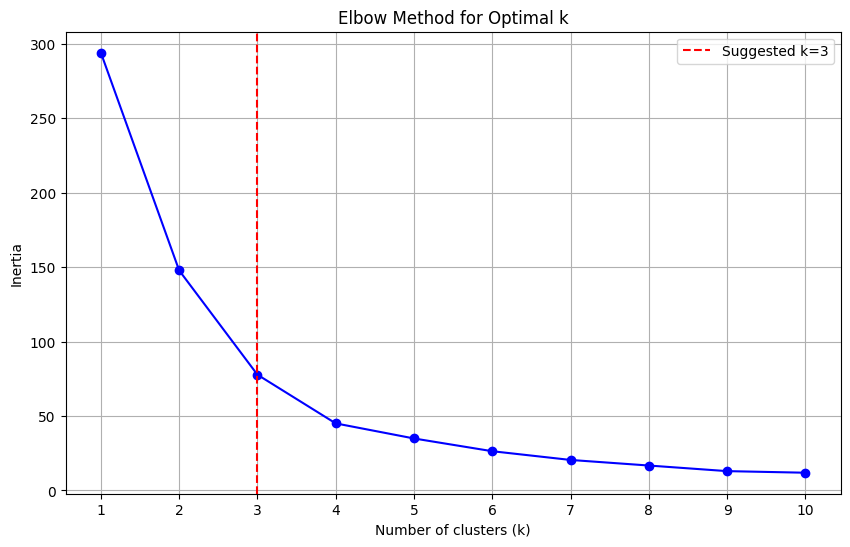

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(elbow_plot_data['K'], elbow_plot_data['Inertia'], marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_plot_data['K'])
plt.grid(True)

plt.axvline(x=3, color='red', linestyle='--', label='Suggested k=3')
plt.legend()

plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

country_trading_data['Cluster'] = kmeans.labels_

# Groups data by cluster and sorts within each cluster by its total trade volume
clustered_data = country_trading_data.sort_values(by=['Cluster', 'Total Trade Volume'], ascending=[True, False])

clustered_data.groupby('Cluster').head()

,Total Trade Volume,Total Trading Partners,Cluster
Ecuador,8.648622e+08,28.0,0
Bonaire,7.665120e+08,21.0,0
Estonia,5.559367e+08,29.0,0
Chile,4.496440e+08,30.0,0
Ukraine,4.359932e+08,17.0,0
Saudi Arabia,2.423842e+10,73.0,1
United Arab Emirates,1.889921e+10,98.0,1
United States of America,1.851639e+10,154.0,1
Singapore,1.195478e+10,133.0,1
Russia,1.190207e+10,83.0,1


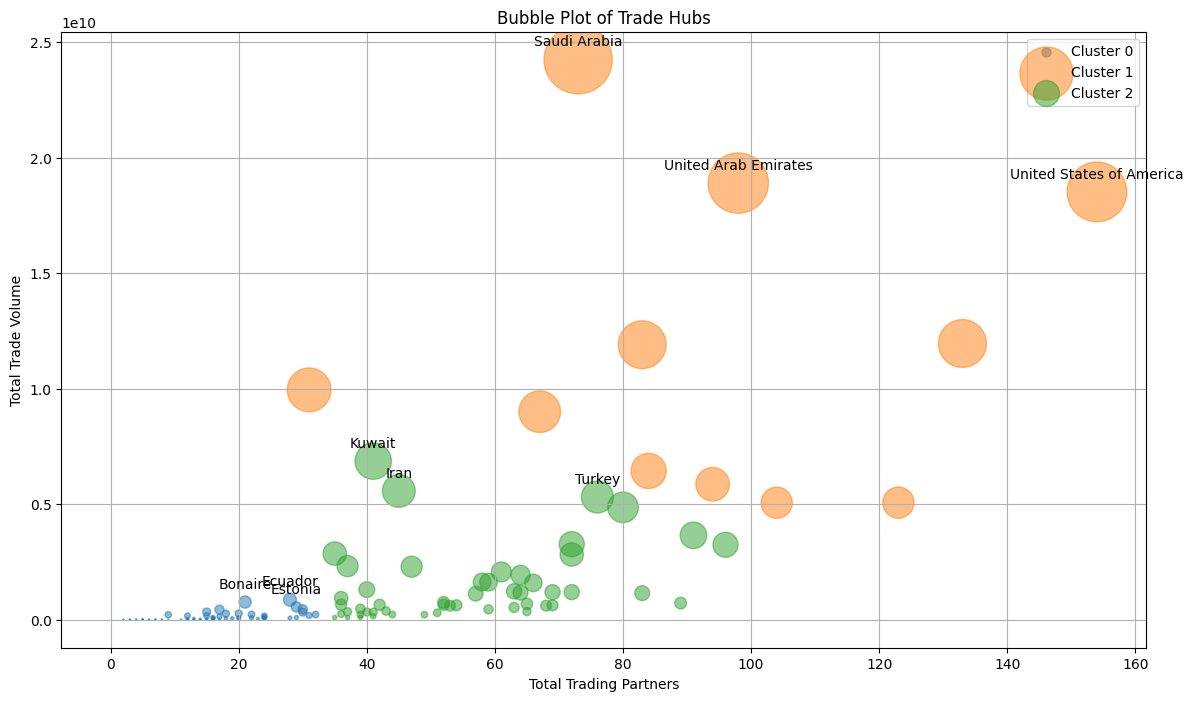

In [36]:
# Bubble plot for the major trading hubs
plt.figure(figsize=(14, 8))

# Bubble sizes are scaled by 'Total Trade Volume' to ensure they are not too large or small.
# A scaling factor is chosen to make the bubbles visually appealing.
bubble_sizes = country_trading_data['Total Trade Volume'] / 1e7

# Scatter plot with bubbles of different sizes (scaled by trade volume)
# and colors representing different clusters.
for cluster in clustered_data['Cluster'].unique():
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Total Trading Partners'], cluster_data['Total Trade Volume'],
                s=bubble_sizes[cluster_data.index], alpha=0.5, label=f'Cluster {cluster}')

plt.title('Bubble Plot of Trade Hubs')
plt.xlabel('Total Trading Partners')
plt.ylabel('Total Trade Volume')
plt.legend()
plt.grid(True)

# Adding country names as annotations near the bubbles for the top countries
top_countries = clustered_data.groupby('Cluster').head(3).index
for country in top_countries:
    plt.annotate(country,
                 (country_trading_data.loc[country, 'Total Trading Partners'],
                  country_trading_data.loc[country, 'Total Trade Volume']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()